## [ 웹크롤링 _ 나무위키 사이트 분석 및 시각화 ]

### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup과 requests라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 URL로부터 HTML 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 HTML 문서가 Javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동=> 크롬드라이버 필요

### [BeautifulSoup과 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
- (env_name) pip install selenium
- (env_name) pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정에서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
  - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### [ BeautifulSoup의 select() VS find_all() ]
- HTML의 특정 요소 선택
- select, select_one 의 경우 CSS 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 CSS 처럼 선택 가능
- 예) soup.select("dl > dt > a") 
- find_all, find 의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class="ah_roll"), find(name="table")

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re # 정규식 표현을 위한 모듈


# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)

# 사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" # 크롤링할 사이트 주소를 정의
driver.get(source_url)  # 크롬 드라이버를 통해 URL의 HTML 문서 가져옴

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

req = driver.page_source
soup = BeautifulSoup(req, "html.parser") # BeautifulSoup의 soup 객체로 변환

#contents_table = soup.find(name="table")  
#table_body = contents_table.find(name="tbody")
#table_rows = table_body.find_all(name="tr")
table_rows = soup.select("table tbody tr")

### [페이지 링크주소 리스트 가져오기]

In [3]:
page_url_base = "https://namu.wiki" # 베이스 URL 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트 생성 

for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        # 특정 속성 선택시 attrs["속성명"] 또는 get("속성명") 사용
        # page_url = page_url_base + td_url[0].get("href")
        # attrs는 딕셔너리 형태로 속성명과 속성값을 불러옴
        # attrs["href"]는 attrs 결과 중 key가 href인 것의 값만 불러옴
        page_url = page_url_base + td_url[0].attrs["href"] 
        if "png" not in page_url:
            page_urls.append(page_url)
            print(page_urls)

['https://namu.wiki/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91']
['https://namu.wiki/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91', 'https://namu.wiki/w/2021-2022%EB%85%84%20%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98%20%EC%9C%84%EA%B8%B0']
['https://namu.wiki/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91', 'https://namu.wiki/w/2021-2022%EB%85%84%20%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98%20%EC%9C%84%EA%B8%B0', 'https://namu.wiki/w/MBC%20%EC%9D%BC%EB%B6%80%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20HYBE%20%EB%B6%88%ED%99%94%20%EC%9D%98%ED%98%B9']
['https://namu.wiki/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91', 'https://namu.wiki/w/2021-2022%EB%85%84%20%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98%20%EC%9C%84%EA%B8%B0', 'https://namu.wiki/w/MBC%20%EC%9D%BC%EB%B6%80%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20HYBE%20%EB%B6%88%ED%99%94%20%EC%9D%98%ED%98%B9', 'https://namu.wiki/w/%EB%B6%84%

In [4]:
td_url[0].attrs

{'data-v-17dde2e0': '',
 'href': '/w/%EA%B4%B4%EB%8F%84Dark/%EC%8A%A4%ED%8B%B1%ED%8C%8C%EC%9D%B4%ED%84%B0%20%EA%B3%A0%EB%93%B1%ED%95%99%EA%B5%90'}

In [5]:
page_urls

['https://namu.wiki/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91',
 'https://namu.wiki/w/2021-2022%EB%85%84%20%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98%20%EC%9C%84%EA%B8%B0',
 'https://namu.wiki/w/MBC%20%EC%9D%BC%EB%B6%80%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20HYBE%20%EB%B6%88%ED%99%94%20%EC%9D%98%ED%98%B9',
 'https://namu.wiki/w/%EB%B6%84%EB%A5%98:%ED%95%B4%EB%A6%AC%20%ED%8F%AC%ED%84%B0%20%EC%8B%A4%EC%82%AC%EC%98%81%ED%99%94%20%EC%8B%9C%EB%A6%AC%EC%A6%88',
 'https://namu.wiki/w/2022%EB%85%84%20%ED%86%B5%EA%B0%80%20%ED%95%B4%EC%A0%80%20%ED%99%94%EC%82%B0%20%ED%8F%AD%EB%B0%9C',
 'https://namu.wiki/w/%EC%B4%88%EC%8B%9C%EA%B3%B5%20%EC%A0%84%ED%88%AC%EA%B8%B0(%EC%9C%A0%ED%9D%AC%EC%99%95)',
 'https://namu.wiki/w/%EB%B2%A0%ED%8A%B8%EB%82%A8%20%EC%9D%B8%EB%AF%BC%EA%B5%B0',
 'https://namu.wiki/w/Critical%20Legends(Roblox)',
 'https://namu.wiki/w/%EB%94%94%EC%95%84%EB%B8%94%EB%A1%9C%203/%EC%A0%84%EC%84%A4%EC%9E%A5%EB%B9%84/%EC%84%B8%ED%8A%B8/%EC%88%98%EB%8F%84%EC%8

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [6]:
# 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path=excutable_path)
# 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
driver.get(page_urls[0])  # page_urls[0] 의 정보를 가져옴
req = driver.page_source # 페이지 소스를 req에 저장
soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

### 타이틀 추출
title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1

### 카테고리 추출
category = contents_table.find_all('ul')[0]

### 내용 추출
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
#div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
content_paragraphs = contents_table.select("div.wiki-paragraph")  

#  내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
# content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text)  # 가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus =" ".join(content_corpus_list) #"텍스트".join(리스트명) => 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) # 제목 출력
print("\n")
print(category.text) # 카테고리 출력
print("\n")
print(content_corpus) # 내용 출력

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

약사사 삼층석탑 


석탑서울특별시의 유형문화재


 서울특별시의 유형문화재 38호 ← 39호 → 40호 금암기적비 약사사삼층석탑 약사사 석불입상  서울특별시 유형문화재 제39호 약사사 삼층석탑藥師寺 三層石塔   소재지 서울특별시 강서구 금낭화로17길 261(개화동 332-1) 시대 고려 말 조선 초 분류 유적건조물 / 종교신앙 / 불교 / 탑 수량 / 면적 석탑 1基, 토지 2.6㎡ 지정연도 1980년 6월 11일 소유자(소유단체) 약사사 관리자(관리단체) 약사사    약사사 삼층석탑[1]  1. 개요2. 상세 서울특별시 강서구 개화동에 있는 사찰 약사사의 석탑이다.  지은 시기는 정확히 알 수 없으나, 여말선초로 추정한다. 왜냐하면 고려 말 조선 초부터 불교 미술이 서서히 쇠퇴해지기 시작했는데, 이 탑의 형태가 별다른 장식없이 최소한으로 필요한 부분만 있는 형식적인 모습이기 때문이다.높이는 약 4m이고 재질은 화강암이다. 지대석, 기단, 탑신으로 구성되어 있으며 상륜부는 현재 남아있지 않다.지대석은 사각형 돌 1장이다. 기단석은 그냥 큰 돌 하나이고, 기단과 탑신 사이에 있는 갑석도 평평한 돌 1장이다.탑신은 옥신과 옥개석으로 이루어져 있다. 옥신과 옥개석은 서로 다른 돌이며 탑신 양쪽에는 우주가 새겨져있다. 탑신은 총 3층인데 맨 아래 1층이 나머지 2, 3층 보다 더 높다. 받침 5단으로 구성된 옥개석은 두터우며 옥신과 비교하면 상대적으로 면적이 넓다. 받침의 처마끼리 만나는 부분과 처마 끄트머리가 올라간 각도는 완만하다못해 거의 수평이다.제일 윗부분에는 둥근 돌 하나가 있다. 이를 제외하고는 상륜부의 어떤 부분도 지금은 사라지고 없다.전반적으로 긴 형태라서 날렵한 느낌을 주는 석탑이다.1980년 6월 11일에 서울특별시 유형문화재 제39호로 지정받았다.[1] 사진 출처 – 문화재청 국가문화유산포털.


### [각각 링크 페이지를 크롤링하여 제목, 카테고리, 내용 출력]

In [7]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [8]:
# 데이터 프레임을 출력합니다.
df

,title,category,content_text
0,약사사 삼층석탑,석탑서울특별시의 유형문화재,서울특별시의 유형문화재38호←39호→40호금암기적비약사사삼층석탑약사사 석불입상 서...
1,2021-2022년 우크라이나 위기,유럽사우크라이나의 역사러시아의 역사러시아-우크라이나 관계미러관계제2차 냉전나무위키 ...,주의. 사건·사고 관련 내용을 설명합니다. 이 문서는 실제로 일어난 사건·사고의 자...
2,MBC 일부 프로그램 HYBE 불화 의혹,2019년/사건사고2020년/사건사고2021년/사건사고박성제 체제문화방송/사건사고쇼...,이 문서는이 문단은 토론을 통해 표제어를 'MBC 일부 프로그램 HYBE 불화 의혹...
3,분류:해리 포터 실사영화 시리즈,해리 포터 시리즈소설 원작 영화시리즈 영화영국의 판타지 영화미국의 판타지 영화학원 ...,이 분류에 대한 설명은 해리 포터 실사영화 시리즈 문서나 문서를 참고하십시오.
4,2022년 통가 해저 화산 폭발,통가화산 폭발쓰나미2022년 재난통신장애,로그인 후 편집 가능한 문서입니다.이 문서는이 문단은 토론을 통해 파일:ISS...
5,초시공 전투기(유희왕),유희왕/OCG/카드군/지정되지 않는 경우유희왕/OCG/기계족그라디우스 시리즈,1. 개요2. 상세3. 카드 목록3.1. 초시공 전투기 빅 바이퍼3.2. 빅토리 바...
6,베트남 인민군,베트남군,세계의 군대 [ 펼치기 · 접기 ] 아시아동아시아대한민국 · 북한 · 중국 · 대만...
7,Critical Legends(Roblox),Roblox/게임,크리티컬 레전드(Critical Legends) [1][2] 제작RrrrRadi...
8,디아블로 3/전설장비/세트/수도사,디아블로 3/전설장비,디아블로 3 전설장비 [ 펼치기 · 접기 ]무기한손 무기 양손 무기 원거리 무기 보...
9,러브 라이브! 니지가사키 학원 스쿨 아이돌 동호회 UNIT LIVE & FAN ME...,니지가사키 학원 스쿨 아이돌 동호회/행사,ラブライブ！虹ヶ咲学園スクールアイドル同好会 UNIT LIVE & FAN MEETING...


# [명사만을 추출하여 워드 클라우드 그리기]

## [코엔엘파이(konlpy)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈 갈래
- 우리나라의 학교 문법에서는 명사, 대명사, 수사, 조사, 동사, 형용사, 관형사, 부사, 감탄사의 아홉 가지로 분류

### [형태소 분석과 품사 태깅]
- 형태소 : 더 이상 분리를 할 수 없는 의미를 갖는최소 단어를 의미
- 형태소 분석 : 형태소를 비롯하여, 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다양한 언어적 속성의 구조를 파악하는 것
- 품사 태깅 : 형태소와 품사를 매칭시키는 것

### [빈도 분석: 문장 형태소 분석 - KoNLPy]
- KoNLPy : 파이썬 한국어 형태소 분석 라이브러리

# <Step2. 추출> : 키워드 추출
### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
#### 파이썬 정규표현식(re) 사용법 - 05. 주석, 치환, 분리
- 정규표현식: 컴파일 => re.compile , 컴파일을 미리 해 두고 이를 저장
- 정규표현식: 치환 => re.sub(pattern, repl, string, count, flags)

In [9]:
# 한글 코드 범위
# ㄱ ~ ㅎ: 0x3131 ~ 0x314e
# ㅏ ~ ㅣ: 0x314f ~ 0x3163
# 가 ~ 힣: 0xac00 ~ 0xd7a3
#  [^ㄱ-|가-힣+] 한글과 띄어쓰기의 정규식 패턴
# 사용자 정의 함수 선언
def text_cleaning(text):
    # 한글과 띄어쓰기를 제외한 모든 글자 패턴을 지정하여 hangul로 정의
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text) # 한글과 띄어쓰기를 제외한 모든 글자 패턴을 '' 빈 문자로 치환
    return result

In [10]:
df['title'][0]

'약사사 삼층석탑 '

In [11]:
print(text_cleaning(df['title'][0]))

약사사 삼층석탑 


In [12]:
# "title", "category", "content_text"]
df['category'][0]

'석탑서울특별시의 유형문화재'

In [13]:
print(text_cleaning(df['category'][0]))

석탑서울특별시의 유형문화재


In [14]:
df['content_text'][0]

' 서울특별시의 유형문화재38호←39호→40호금암기적비약사사삼층석탑약사사 석불입상 서울특별시 유형문화재 제39호약사사 삼층석탑藥師寺 三層石塔소재지서울특별시 강서구 금낭화로17길 261(개화동 332-1)시대고려 말 조선 초분류유적건조물 / 종교신앙 / 불교 / 탑수량 / 면적석탑 1基, 토지 2.6㎡지정연도1980년 6월 11일소유자(소유단체)약사사관리자(관리단체)약사사 약사사 삼층석탑[1] 1. 개요2. 상세서울특별시 강서구 개화동에 있는 사찰 약사사의 석탑이다. 지은 시기는 정확히 알 수 없으나, 여말선초로 추정한다. 왜냐하면 고려 말 조선 초부터 불교 미술이 서서히 쇠퇴해지기 시작했는데, 이 탑의 형태가 별다른 장식없이 최소한으로 필요한 부분만 있는 형식적인 모습이기 때문이다.높이는 약 4m이고 재질은 화강암이다. 지대석, 기단, 탑신으로 구성되어 있으며 상륜부는 현재 남아있지 않다.지대석은 사각형 돌 1장이다. 기단석은 그냥 큰 돌 하나이고, 기단과 탑신 사이에 있는 갑석도 평평한 돌 1장이다.탑신은 옥신과 옥개석으로 이루어져 있다. 옥신과 옥개석은 서로 다른 돌이며 탑신 양쪽에는 우주가 새겨져있다. 탑신은 총 3층인데 맨 아래 1층이 나머지 2, 3층 보다 더 높다. 받침 5단으로 구성된 옥개석은 두터우며 옥신과 비교하면 상대적으로 면적이 넓다. 받침의 처마끼리 만나는 부분과 처마 끄트머리가 올라간 각도는 완만하다못해 거의 수평이다.제일 윗부분에는 둥근 돌 하나가 있다. 이를 제외하고는 상륜부의 어떤 부분도 지금은 사라지고 없다.전반적으로 긴 형태라서 날렵한 느낌을 주는 석탑이다.1980년 6월 11일에 서울특별시 유형문화재 제39호로 지정받았다.[1] 사진 출처 – 문화재청 국가문화유산포털.'

In [15]:
print(text_cleaning(df['content_text'][0]))

 서울특별시의 유형문화재호호호금암기적비약사사삼층석탑약사사 석불입상 서울특별시 유형문화재 제호약사사 삼층석탑 소재지서울특별시 강서구 금낭화로길 개화동 시대고려 말 조선 초분류유적건조물  종교신앙  불교  탑수량  면적석탑  토지 지정연도년 월 일소유자소유단체약사사관리자관리단체약사사 약사사 삼층석탑  개요 상세서울특별시 강서구 개화동에 있는 사찰 약사사의 석탑이다 지은 시기는 정확히 알 수 없으나 여말선초로 추정한다 왜냐하면 고려 말 조선 초부터 불교 미술이 서서히 쇠퇴해지기 시작했는데 이 탑의 형태가 별다른 장식없이 최소한으로 필요한 부분만 있는 형식적인 모습이기 때문이다높이는 약 이고 재질은 화강암이다 지대석 기단 탑신으로 구성되어 있으며 상륜부는 현재 남아있지 않다지대석은 사각형 돌 장이다 기단석은 그냥 큰 돌 하나이고 기단과 탑신 사이에 있는 갑석도 평평한 돌 장이다탑신은 옥신과 옥개석으로 이루어져 있다 옥신과 옥개석은 서로 다른 돌이며 탑신 양쪽에는 우주가 새겨져있다 탑신은 총 층인데 맨 아래 층이 나머지  층 보다 더 높다 받침 단으로 구성된 옥개석은 두터우며 옥신과 비교하면 상대적으로 면적이 넓다 받침의 처마끼리 만나는 부분과 처마 끄트머리가 올라간 각도는 완만하다못해 거의 수평이다제일 윗부분에는 둥근 돌 하나가 있다 이를 제외하고는 상륜부의 어떤 부분도 지금은 사라지고 없다전반적으로 긴 형태라서 날렵한 느낌을 주는 석탑이다년 월 일에 서울특별시 유형문화재 제호로 지정받았다 사진 출처  문화재청 국가문화유산포털


In [16]:
# 각 피처마다 데이터 전처리를 적용
# 각 피처마다 한글과 띄어씌기를 제외한 모든 부분을 제가
df['title'] = df['title'].apply(lambda x:text_cleaning(x))
df['category'] = df['category'].apply(lambda x:text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x:text_cleaning(x))

df.head(5)

,title,category,content_text
0,약사사 삼층석탑,석탑서울특별시의 유형문화재,서울특별시의 유형문화재호호호금암기적비약사사삼층석탑약사사 석불입상 서울특별시 유형문...
1,년 우크라이나 위기,유럽사우크라이나의 역사러시아의 역사러시아우크라이나 관계미러관계제차 냉전나무위키 외교...,주의 사건사고 관련 내용을 설명합니다 이 문서는 실제로 일어난 사건사고의 자세한 내...
2,일부 프로그램 불화 의혹,년사건사고년사건사고년사건사고박성제 체제문화방송사건사고쇼 음악중심아이돌스타 육상 선수...,이 문서는이 문단은 토론을 통해 표제어를 일부 프로그램 불화 의혹으로 하기으로 ...
3,분류해리 포터 실사영화 시리즈,해리 포터 시리즈소설 원작 영화시리즈 영화영국의 판타지 영화미국의 판타지 영화학원 ...,이 분류에 대한 설명은 해리 포터 실사영화 시리즈 문서나 문서를 참고하십시오
4,년 통가 해저 화산 폭발,통가화산 폭발쓰나미년 재난통신장애,로그인 후 편집 가능한 문서입니다이 문서는이 문단은 토론을 통해 파일 사진과 이...


[말뭉치 만들기]

In [17]:
# 각 피처마다 말뭉치를 생성
df['title'].tolist()

['약사사 삼층석탑 ',
 '년 우크라이나 위기 ',
 ' 일부 프로그램  불화 의혹 ',
 '분류해리 포터 실사영화 시리즈 ',
 '년 통가 해저 화산 폭발 ',
 '초시공 전투기유희왕 ',
 '베트남 인민군 ',
 '  ',
 '디아블로 전설장비세트수도사 ',
 '러브 라이브 니지가사키 학원 스쿨 아이돌 동호회      ']

In [18]:
title_corpus = ''.join(df['title'].tolist())
category_corpus = ''.join(df['category'].tolist())
content_corpus = ''.join(df['content_text'].tolist())

print(title_corpus)
print(category_corpus)

약사사 삼층석탑 년 우크라이나 위기  일부 프로그램  불화 의혹 분류해리 포터 실사영화 시리즈 년 통가 해저 화산 폭발 초시공 전투기유희왕 베트남 인민군   디아블로 전설장비세트수도사 러브 라이브 니지가사키 학원 스쿨 아이돌 동호회      
석탑서울특별시의 유형문화재유럽사우크라이나의 역사러시아의 역사러시아우크라이나 관계미러관계제차 냉전나무위키 외교 프로젝트년사건사고년사건사고년사건사고박성제 체제문화방송사건사고쇼 음악중심아이돌스타 육상 선수권대회 갑질 사건사고대한민국의 아이돌 사건 사고해리 포터 시리즈소설 원작 영화시리즈 영화영국의 판타지 영화미국의 판타지 영화학원 영화존 윌리엄스워너 브라더스통가화산 폭발쓰나미년 재난통신장애유희왕카드군지정되지 않는 경우유희왕기계족그라디우스 시리즈베트남군게임디아블로 전설장비니지가사키 학원 스쿨 아이돌 동호회행사


In [19]:
import konlpy

In [20]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger =Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [21]:
content_corpus

' 서울특별시의 유형문화재호호호금암기적비약사사삼층석탑약사사 석불입상 서울특별시 유형문화재 제호약사사 삼층석탑 소재지서울특별시 강서구 금낭화로길 개화동 시대고려 말 조선 초분류유적건조물  종교신앙  불교  탑수량  면적석탑  토지 지정연도년 월 일소유자소유단체약사사관리자관리단체약사사 약사사 삼층석탑  개요 상세서울특별시 강서구 개화동에 있는 사찰 약사사의 석탑이다 지은 시기는 정확히 알 수 없으나 여말선초로 추정한다 왜냐하면 고려 말 조선 초부터 불교 미술이 서서히 쇠퇴해지기 시작했는데 이 탑의 형태가 별다른 장식없이 최소한으로 필요한 부분만 있는 형식적인 모습이기 때문이다높이는 약 이고 재질은 화강암이다 지대석 기단 탑신으로 구성되어 있으며 상륜부는 현재 남아있지 않다지대석은 사각형 돌 장이다 기단석은 그냥 큰 돌 하나이고 기단과 탑신 사이에 있는 갑석도 평평한 돌 장이다탑신은 옥신과 옥개석으로 이루어져 있다 옥신과 옥개석은 서로 다른 돌이며 탑신 양쪽에는 우주가 새겨져있다 탑신은 총 층인데 맨 아래 층이 나머지  층 보다 더 높다 받침 단으로 구성된 옥개석은 두터우며 옥신과 비교하면 상대적으로 면적이 넓다 받침의 처마끼리 만나는 부분과 처마 끄트머리가 올라간 각도는 완만하다못해 거의 수평이다제일 윗부분에는 둥근 돌 하나가 있다 이를 제외하고는 상륜부의 어떤 부분도 지금은 사라지고 없다전반적으로 긴 형태라서 날렵한 느낌을 주는 석탑이다년 월 일에 서울특별시 유형문화재 제호로 지정받았다 사진 출처  문화재청 국가문화유산포털주의 사건사고 관련 내용을 설명합니다 이 문서는 실제로 일어난 사건사고의 자세한 내용과 설명을 포함하고 있습니다 신냉전제차 냉전            펼치기  접기 주요 사건탈냉전유고슬라비아 내전  년 러시아 헌정위기  체첸 전쟁  햇볕정책   테러  미국아프가니스탄 전쟁  이라크 전쟁  남오세티야 전쟁   베이징 올림픽서방러시아 냉전유로마이단  년 크림 위기  돈바스 전쟁  세르게이 스크리팔 암살 미수 사건  년 베네수엘라 정치 위기  년 벨라

In [22]:
count

Counter({'서울특별시': 5,
         '유형문화재': 3,
         '호호': 1,
         '호': 3,
         '금암기적비': 1,
         '약사사삼층석탑': 1,
         '약사사': 6,
         '석불입상': 1,
         '제호': 2,
         '삼층석탑': 2,
         '소재지': 1,
         '강서구': 2,
         '금낭화': 1,
         '길': 9,
         '개': 31,
         '화동': 2,
         '대고려': 1,
         '말': 24,
         '조선': 3,
         '초': 54,
         '분류': 3,
         '유적': 1,
         '건조물': 1,
         '종교': 1,
         '신앙': 1,
         '불교': 2,
         '탑': 3,
         '수량': 1,
         '면적': 6,
         '석탑': 3,
         '토지': 2,
         '지정연': 1,
         '년': 229,
         '월': 163,
         '소유자': 1,
         '소유': 1,
         '단체': 4,
         '관리자': 1,
         '관리': 3,
         '개요': 10,
         '상세': 10,
         '사찰': 1,
         '지은': 1,
         '시기': 6,
         '알': 12,
         '수': 163,
         '말선': 1,
         '초로': 1,
         '추정': 12,
         '고려': 3,
         '미술': 1,
         '서서히': 4,
         '시작': 41,
         '이': 

[키워드 가다듬기]

In [23]:
remove_char_counter=Counter({x:count[x] for x in count if len(x)>1})
print(remove_char_counter)

Counter({'토론': 312, '합의': 306, '사항': 299, '공격': 154, '우크라이나': 139, '러시아': 133, '라이브': 133, '효과': 118, '미국': 117, '티어': 97, '사용': 96, '문서': 94, '속성': 81, '러브': 80, '카드': 79, '세트': 79, '중국': 75, '쓰나미': 67, '문단': 65, '출연': 64, '때문': 62, '관련': 62, '베트남': 62, '역사': 59, '이전': 59, '전쟁': 57, '방어': 57, '애니메이션': 56, '시리즈': 55, '통가': 51, '오브': 51, '이후': 50, '게임': 49, '경우': 49, '가지': 49, '몬스터': 49, '국가': 47, '피해': 47, '방송': 45, '일본': 45, '이름': 45, '상황': 44, '시작': 41, '지역': 40, '전투': 40, '폭발': 39, '바이퍼': 39, '위기': 38, '하나': 37, '다른': 37, '문제': 37, '여자친구': 37, '분화': 37, '사건': 36, '무기': 36, '또한': 36, '공연': 36, '음반': 36, '대한': 35, '파괴': 35, '전투기': 35, '증가': 35, '유닛': 35, '음악중심': 34, '기간': 34, '상태': 33, '화산': 33, '추가': 33, '학원': 33, '보스': 33, '골드': 33, '보석': 33, '무작위': 33, '갤러리': 33, '민첩': 32, '멤버': 31, '공력': 31, '싱글': 31, '모든': 30, '활동': 30, '대미지': 30, '나토': 29, '직업': 29, '발생': 28, '아이돌': 28, '기본': 28, '주요': 27, '대만': 27, '장비': 27, '아이템': 27, '체력': 27, '마나': 27, '스쿠페스': 27, '러브라이브': 27, '내용': 26, '기타'

[불영어 제거]
- 실질적인 의미가 없는 키워드 처리
- 관사나 접속사 등 실질적인 의마가 없으면서 동시에 의미적인 독립을 할수 없는 품사 제거
- 한국어 약식 불용어 사전 예시 파입입니다. 출처 (http://www.ranks.nl/stopwords/korean)
- 인터넷 검색 시 검색 용어로 사용하지는 단어, 관사, 전치사, 조사, 접속사 등은 검색 색인 단어로 의마가 없는 단어
- 그러나, 각 검색 엔진마다 내용은 다를 수도 있음

In [24]:
korean_stopwords_path = 'korean_stopwords.txt'

# 텍스트 파일을 오픈 
with open(korean_stopwords_path,encoding = 'utf8') as f: # 불용어 텍스트 파일을 열어 f로 치환
    stopwords = f.readlines() # 파일로 불용어를 한줄씩 읽어들임
stopwords = [x.strip() for x in stopwords] # 리스트 생성
print(stopwords[:10]) #리스트 출력

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [25]:
#나무위키 페이지에 맞는 불용어를 추가
namu_wiki_stopwords = ['상위','문서','내용','누설','아래','해당','설명','표기','추가','모든','사용','매우','가장',
                      '줄거리','요소','상황','편집','틀','경우','때문','모습','정도','이후','사실','생각','인물','이름','년월']
#나무위키 불용어를 기존 불용어 사전에 하나씩 추가
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [26]:
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [27]:
# 키워드 데이터에서 불용어를 제거
# Counter는 딕셔너리로 x는 키 ,remove_char_counter[x]값으로 x는 키워드,remove_char_counter[x]는 빈도수
# 기존 한글자 키워드를 제거한 content_corpus의 키워드에서 불용어 사전에 있지 않은 키워드만 remove_char_counter에 저장

remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

print(remove_char_counter)

Counter({'토론': 312, '합의': 306, '사항': 299, '공격': 154, '우크라이나': 139, '러시아': 133, '라이브': 133, '효과': 118, '미국': 117, '티어': 97, '사용': 96, '문서': 94, '속성': 81, '러브': 80, '카드': 79, '세트': 79, '중국': 75, '쓰나미': 67, '문단': 65, '출연': 64, '때문': 62, '관련': 62, '베트남': 62, '역사': 59, '이전': 59, '전쟁': 57, '방어': 57, '애니메이션': 56, '시리즈': 55, '통가': 51, '오브': 51, '이후': 50, '게임': 49, '경우': 49, '가지': 49, '몬스터': 49, '국가': 47, '피해': 47, '방송': 45, '일본': 45, '이름': 45, '상황': 44, '시작': 41, '지역': 40, '전투': 40, '폭발': 39, '바이퍼': 39, '위기': 38, '하나': 37, '다른': 37, '문제': 37, '여자친구': 37, '분화': 37, '사건': 36, '무기': 36, '또한': 36, '공연': 36, '음반': 36, '대한': 35, '파괴': 35, '전투기': 35, '증가': 35, '유닛': 35, '음악중심': 34, '기간': 34, '상태': 33, '화산': 33, '추가': 33, '학원': 33, '보스': 33, '골드': 33, '보석': 33, '무작위': 33, '갤러리': 33, '민첩': 32, '멤버': 31, '공력': 31, '싱글': 31, '모든': 30, '활동': 30, '대미지': 30, '나토': 29, '직업': 29, '발생': 28, '아이돌': 28, '기본': 28, '주요': 27, '대만': 27, '장비': 27, '아이템': 27, '체력': 27, '마나': 27, '스쿠페스': 27, '러브라이브': 27, '내용': 26, '기타'

# <step3. 시각화>: 워드 클라우드 시각화

[pytagcloud 사용하기]
- 1) 아래 코드 실행을 위해, anaconda prompt 혹은 Terminal에서 아래와 같은 패키지들을 설치
- pip install pytagcloud pygame simplejson
- 2) 한글 폰트(예: NanumBarunGothic.ttf) 파일 지정
- Windosw OS : {anaconda_path}\envs{env_name}\Lib\site-packages\pytagcloud\fonts
  - C:\Users\사용자명\anaconda3\Lib\site-packages\pytagcloud\fonts
- 한글 나눔글꼴 다운로드 http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행
- 3) 위 방법으로 한글 폰트가 지정이 안될 경우 다음 방법으로 한글 폰트 지정
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가하고 font.json 파일을 저장합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
    - },

In [28]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

pytagcloud.create_tag_image(taglist, 'wordcloud_heart.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


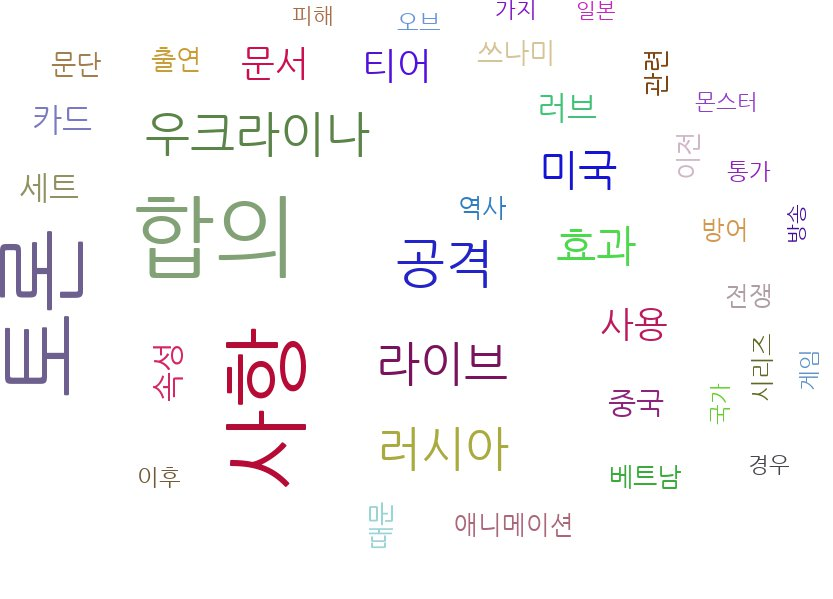

In [29]:
# 생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename='wordcloud_heart.jpg')

[wordcloud 와 pillow 라이브러리를 이용한 워드 클라우드 시각화]
- https://doitgrow.com/34
- https://github.com/amueller/word_cloud

< 1. wordcloud 설치 >
   - 콘다 프롬프트에서 아래 명령어 실행
   - conda install -c conda-forge wordcloud
   
< 2. pillow 설치 >
   - pip install pillow

In [30]:
from PIL import Image
from wordcloud import WordCloud

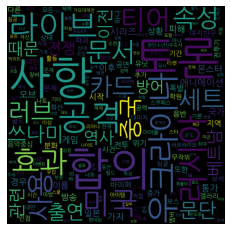

In [31]:
wc = WordCloud(font_path='NanumGothic', width=1200, height=1200, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(remove_char_counter)
plt.figure()
plt.imshow(gen)
plt.axis('off')                                 # 축 설정
plt.savefig('wordcloud.jpg')       # 워드 클라우드 저장

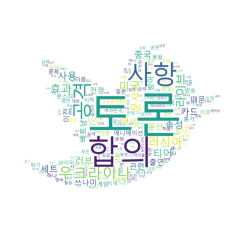

In [32]:
from PIL import Image
from wordcloud import WordCloud

# 블랙 이미지의 jpg나 png 파일을 마스크로 적용
img = Image.open('wordcloud_bird.jpg')
img_array = np.array(img)

wc = WordCloud(font_path='malgun', width=1200, height=1200, scale=4.0, max_font_size=500, mask=img_array, background_color = "white")
gen = wc.generate_from_frequencies(remove_char_counter)

plt.figure()
plt.imshow(gen)
plt.axis('off')                          # 축 설정
plt.savefig('wordcloud_bird.png')       # 워드 클라우드 저장